In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# handling warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing our data

df=pd.read_csv('Travel.csv')

In [4]:
# checking out our data

df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Data Cleaning:
- Handle Missing Values
- Removing Duplicates
- Checking DataType
- Understanding the Dataset

In [5]:
# checking for null values

df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

#### Checking all categories

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [8]:
df['CityTier'].value_counts()

CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

In [9]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [11]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [12]:
df['NumberOfChildrenVisiting'].value_counts()

NumberOfChildrenVisiting
1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: count, dtype: int64

In [13]:
df['NumberOfFollowups'].value_counts()

NumberOfFollowups
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: count, dtype: int64

In [14]:
df['NumberOfPersonVisiting'].value_counts()

NumberOfPersonVisiting
3    2402
2    1418
4    1026
1      39
5       3
Name: count, dtype: int64

In [15]:
df['NumberOfTrips'].value_counts()

NumberOfTrips
2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: count, dtype: int64

In [16]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [17]:
# in the 'Gender' column we should merge 'Fe Male' and 'Female' values together as they represent the same catgeory

df['Gender']=df['Gender'].replace('Fe Male','Female')

In [18]:
# checking out our changes

df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [19]:
# replacing 'Single' category with 'Unmarried' in the 'Marital Status' column
df['MaritalStatus']=df['MaritalStatus'].replace('Single', 'Unmarried')

# checking out our changes
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

#### Handling Missing Values

In [20]:
# checking the % of mising values in every column

features_with_na = [features for features in df.columns if df[features].isnull().sum()>0]
for feature in features_with_na:
    print(feature,':', np.round(df[feature].isnull().mean()*100,5),'% missing values')

Age : 4.62357 % missing values
TypeofContact : 0.51146 % missing values
DurationOfPitch : 5.13502 % missing values
NumberOfFollowups : 0.92062 % missing values
PreferredPropertyStar : 0.53191 % missing values
NumberOfTrips : 2.86416 % missing values
NumberOfChildrenVisiting : 1.35025 % missing values
MonthlyIncome : 4.76678 % missing values


In [21]:
# statistics on numerical columns with null values

df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


Imputing Null Values:-
- impute median age for age column
- impute mode for TypeofContract
- impute for median of duration of pitch
- impute mode for NumberofFollowUp as it is discrete feature
- impute mode for prefferred PropertyStar
- impute median for NumberofTrips
- impute mode for NumberOfChildrenVisitng
- impute median for MonthlyIncome

In [22]:
# Age
df['Age'].fillna(value=df['Age'].median(), inplace=True)

# TypeofContract
df['TypeofContact'].fillna(value=df['TypeofContact'].mode()[0], inplace=True)

# DurationofPitch
df['DurationOfPitch'].fillna(value=df['DurationOfPitch'].median(), inplace=True)

# NUmberofFollowUp
df['NumberOfFollowups'].fillna(value=df['NumberOfFollowups'].mode()[0], inplace=True)

# PropertyStar
df['PreferredPropertyStar'].fillna(value=df['PreferredPropertyStar'].mode()[0], inplace=True)

# NumberofTrips
df['NumberOfTrips'].fillna(value=df['NumberOfTrips'].median(), inplace=True)

# NumberofChildrenVisiting
df['NumberOfChildrenVisiting'].fillna(value=df['NumberOfChildrenVisiting'].mode()[0], inplace=True)

# MonthlyIncome
df['MonthlyIncome'].fillna(value=df['MonthlyIncome'].median(), inplace=True)

In [23]:
# removing the customer ID column as it is not important

df.drop(columns=['CustomerID'], axis=1, inplace=True)

### Feature Enginerring

In [24]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [25]:
# the 2 columns 'Number of Children Visitng' and 'Number of Persons Visitng' can be combined into one. We would generally want to reduce our number of features by either conjoining features or removing unnecessary features

df['TotalVisiting']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'], inplace=True)

In [26]:
# getting all numeric features

numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
print(f'Number of Numeric Features = {len(numeric_features)}\nNumeric Features are:\n{numeric_features}')

Number of Numeric Features = 12
Numeric Features are:
['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']


In [27]:
# getting all categorical features

categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(f"Number of Categorical Features = {len(categorical_features)}\nCategorical Features are:\n{categorical_features}")

Number of Categorical Features = 6
Categorical Features are:
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [28]:
# discrete features

discrete_features = [feature for feature in numeric_features if len(df[feature].unique())<=25]
print(f'Number of Discrete Features:{len(discrete_features)}\nDiscrete Features:\n{discrete_features}')

Number of Discrete Features:9
Discrete Features:
['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisiting']


In [29]:
# continuous features

continuous_features = [feature for feature in numeric_features if len(df[feature].unique())>25]
print(f'Number of Continuous Features = {len(continuous_features)}\nContinuous Features are:\n{continuous_features}')

Number of Continuous Features = 3
Continuous Features are:
['Age', 'DurationOfPitch', 'MonthlyIncome']


### Splitting our Dataset into Train-Test Split

In [30]:
# splitting our data into independent and dependent features
X=df.drop(columns=['ProdTaken'], axis=1)
y=df['ProdTaken']
# splitting into train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [31]:
# creating column transforemr with 3 types of transformer

categorical_features_X = X.select_dtypes(include='object').columns
numeric_features_X = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
    ("OneHotEncoder", oh_transformer, categorical_features_X),
    ("StandardScaler", numeric_transformer, numeric_features_X)
    ]
)

In [32]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [33]:
# applying transformation to training dataset

X_train = preprocessor.fit_transform(X_train)

In [34]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.453700,-1.113699,-2.727983,1.788266,-0.692889,-0.633588,0.693648,-1.273735,-0.234973,-0.775890
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.453700,-0.161856,1.289877,-0.722370,-0.692889,-0.633588,-0.043353,0.785093,1.247289,-0.068397
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.366899,1.979792,-2.727983,-0.722370,-0.138861,1.578313,-0.043353,0.785093,1.640591,-2.190877
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.453700,1.622851,0.285412,-0.722370,-0.692889,-0.633588,-1.517356,0.785093,-0.950360,-0.775890
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.719901,-0.994719,1.289877,-0.722370,-0.138861,-0.633588,1.430650,0.785093,0.667951,0.639096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.453700,-0.756758,0.285412,-0.722370,-0.138861,-0.633588,-0.043353,0.785093,0.110036,1.346590
3906,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.719901,1.265909,-0.719053,-0.722370,0.415166,-0.633588,-0.043353,0.785093,0.230489,-0.775890
3907,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.719901,-0.280836,0.285412,-0.722370,-0.138861,-0.633588,-0.043353,0.785093,-0.463288,-0.775890
3908,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.453700,-0.637778,0.285412,-0.722370,-0.692889,-0.633588,-0.780354,0.785093,1.069147,1.346590


In [35]:
# applying transformation to testing dataset

X_test = preprocessor.transform(X_test)

In [36]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,-0.719901,-0.994719,0.285412,-0.722370,-0.692889,-0.633588,1.430650,0.785093,2.763750,0.639096
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-0.719901,-0.756758,-0.719053,-0.722370,-0.692889,-0.633588,-1.517356,0.785093,0.157202,-1.483384
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.719901,-0.518797,-0.719053,0.532948,-1.246916,-0.633588,-0.043353,0.785093,-0.094414,-0.068397
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.719901,1.146929,-0.719053,-0.722370,1.523222,-0.633588,1.430650,-1.273735,-0.231403,-0.068397
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.453700,-0.280836,-1.723518,-0.722370,-0.692889,1.578313,-0.780354,0.785093,-0.742340,0.639096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.719901,2.217753,-0.719053,1.788266,0.969194,1.578313,1.430650,-1.273735,1.556406,-1.483384
974,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.719901,-0.756758,-0.719053,-0.722370,-0.692889,1.578313,1.430650,0.785093,-1.068933,-0.775890
975,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.719901,-0.280836,0.285412,0.532948,2.631277,-0.633588,0.693648,-1.273735,0.004053,0.639096
976,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.453700,1.860811,-0.719053,1.788266,-1.246916,-0.633588,-0.043353,0.785093,-0.180478,-1.483384


### Training our Gradient Boost Classifier Model

In [36]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [37]:
models={
    "Adaboost Classifier":AdaBoostClassifier(),
    "Random Forest":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]

    # model training
    model.fit(X_train, y_train) 

    # making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set performance-evaluation
    model_train_accuracy=accuracy_score(y_train, y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train, y_train_pred)
    model_train_rocauc=roc_auc_score(y_train, y_train_pred)
    model_train_f1=f1_score(y_train, y_train_pred, average='weighted')

    # test set performance evaluation
    model_test_accuracy=accuracy_score(y_test, y_test_pred)
    model_test_precision=precision_score(y_test, y_test_pred)
    model_test_recall=recall_score(y_test, y_test_pred)
    model_test_rocauc=roc_auc_score(y_test, y_test_pred)
    model_test_f1=f1_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Training Set:")
    print('- Accuracy Score : ',model_train_accuracy)
    print('- Precision Score : ',model_train_precision)
    print('- Recall Score : ', model_train_recall)
    print('- ROC AUC Score : ',model_train_rocauc)
    print('- F1 Score : ',model_train_f1)

    print('------------------------------------------------------------------------------')

    print("Model Performance for Testing Set:")
    print('- Accuracy Score : ',model_test_accuracy)
    print('- Precision Score : ',model_test_precision)
    print('- Recall Score : ', model_test_recall)
    print('- ROC AUC Score : ',model_test_rocauc)
    print('- F1 Score : ',model_test_f1)

Adaboost Classifier
Model Performance for Training Set:
- Accuracy Score :  0.8450127877237852
- Precision Score :  0.7787610619469026
- Recall Score :  0.24043715846994534
- ROC AUC Score :  0.6123519964785221
- F1 Score :  0.8097962615608909
------------------------------------------------------------------------------
Model Performance for Testing Set:
- Accuracy Score :  0.8333333333333334
- Precision Score :  0.7192982456140351
- Recall Score :  0.21808510638297873
- ROC AUC Score :  0.5989159709130084
- F1 Score :  0.3346938775510204
Random Forest
Model Performance for Training Set:
- Accuracy Score :  1.0
- Precision Score :  1.0
- Recall Score :  1.0
- ROC AUC Score :  1.0
- F1 Score :  1.0
------------------------------------------------------------------------------
Model Performance for Testing Set:
- Accuracy Score :  0.9263803680981595
- Precision Score :  0.9264705882352942
- Recall Score :  0.6702127659574468
- ROC AUC Score :  0.8287772690546727
- F1 Score :  0.77777777

#### Hyper-Parameter Tuning

In [38]:
rf_params={
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,'auto',8],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,300,500,1000]
}

ab_params={
    'n_estimators':[50,60,70,80,90],
    'algorithm':['SAMME','SAMME.R']

}

gb_params={
    'loss':['log_loss', 'exponential'],
    'learning_rate':[0.1, 0.3, 0.5, 0.7, 0.2],
    'n_estimators':[50,100,150,200,250,300,500],
    'criterion':['friedman_mse', 'squared_error'],
    'subsample':[0.1, 0.2, 0.3, 0.5, 0.7, 1.0]
}

In [39]:
# Models list for Hyper-Parameter Tuning

randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params),
    ("AB", AdaBoostClassifier(), ab_params),
    ("GB", GradientBoostingClassifier(), gb_params)
]

In [40]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name, model, param in randomcv_models:
    random=RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=100, cv=3, verbose=2, n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f'---------- Best Params for {model_name} ----------')
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=15, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[

/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'alg

[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.0s[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.0s

[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.0s
[CV] END .................al

Random Forest
Model Performance for Training Set:
- Accuracy Score :  1.0
- Precision Score :  1.0
- Recall Score :  1.0
- ROC AUC Score :  1.0
- F1 Score :  1.0
------------------------------------------------------------------------------
Model Performance for Testing Set:
- Accuracy Score :  0.9304703476482618
- Precision Score :  0.9285714285714286
- Recall Score :  0.6914893617021277
- ROC AUC Score :  0.8394155669270132
- F1 Score :  0.7926829268292683


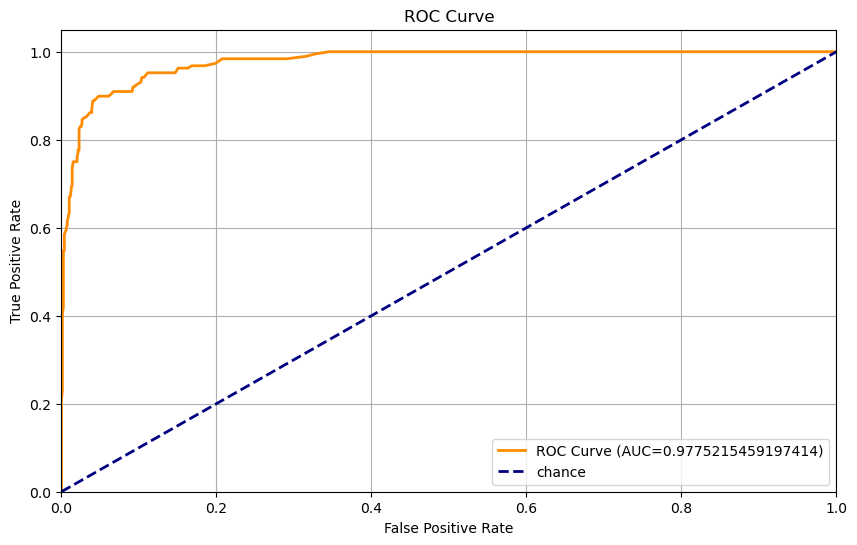

Adaboost
Model Performance for Training Set:
- Accuracy Score :  0.8460358056265984
- Precision Score :  0.782608695652174
- Recall Score :  0.2459016393442623
- ROC AUC Score :  0.6150842369156806
- F1 Score :  0.8114993013154401
------------------------------------------------------------------------------
Model Performance for Testing Set:
- Accuracy Score :  0.8333333333333334
- Precision Score :  0.7192982456140351
- Recall Score :  0.21808510638297873
- ROC AUC Score :  0.5989159709130084
- F1 Score :  0.3346938775510204


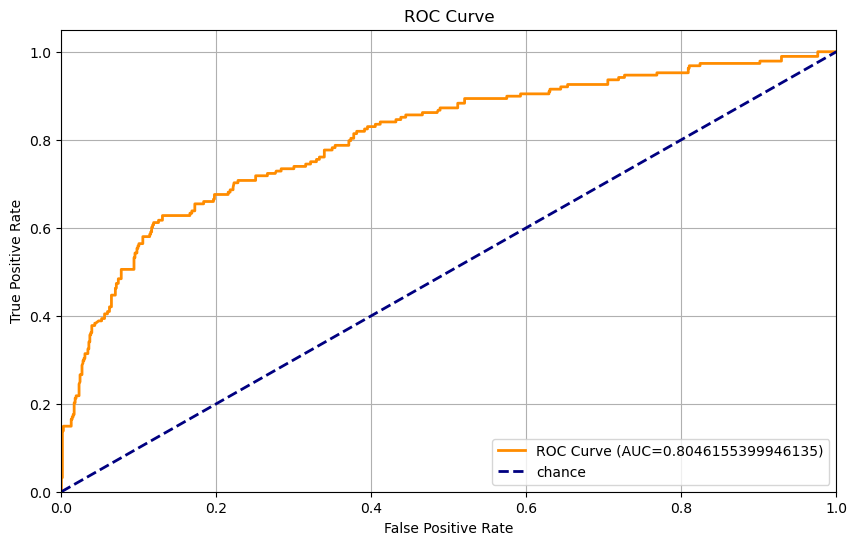

GradientBoostingClassifier
Model Performance for Training Set:
- Accuracy Score :  1.0
- Precision Score :  1.0
- Recall Score :  1.0
- ROC AUC Score :  1.0
- F1 Score :  1.0
------------------------------------------------------------------------------
Model Performance for Testing Set:
- Accuracy Score :  0.9355828220858896
- Precision Score :  0.874251497005988
- Recall Score :  0.776595744680851
- ROC AUC Score :  0.8750067330999192
- F1 Score :  0.8225352112676056


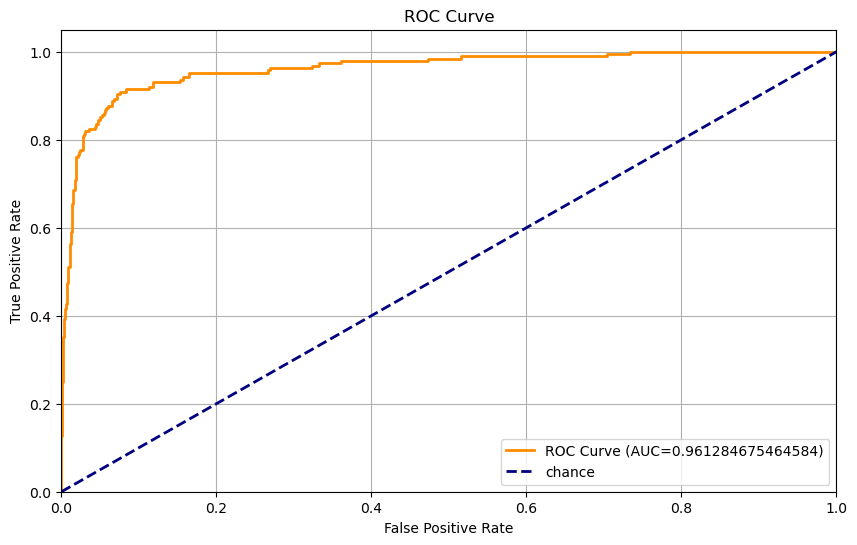

In [41]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features=8, max_depth=None),
    "Adaboost":AdaBoostClassifier(n_estimators=60, algorithm='SAMME'),
    "GradientBoostingClassifier":GradientBoostingClassifier(subsample=1.0, n_estimators=500, loss='exponential', learning_rate=0.7, criterion='squared_error')
}

for i in range(len(list(models))):
    model = list(models.values())[i]

    # model training
    model.fit(X_train, y_train) 

    # making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set performance-evaluation
    model_train_accuracy=accuracy_score(y_train, y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train, y_train_pred)
    model_train_rocauc=roc_auc_score(y_train, y_train_pred)
    model_train_f1=f1_score(y_train, y_train_pred, average='weighted')

    # test set performance evaluation
    model_test_accuracy=accuracy_score(y_test, y_test_pred)
    model_test_precision=precision_score(y_test, y_test_pred)
    model_test_recall=recall_score(y_test, y_test_pred)
    model_test_rocauc=roc_auc_score(y_test, y_test_pred)
    model_test_f1=f1_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Training Set:")
    print('- Accuracy Score : ',model_train_accuracy)
    print('- Precision Score : ',model_train_precision)
    print('- Recall Score : ', model_train_recall)
    print('- ROC AUC Score : ',model_train_rocauc)
    print('- F1 Score : ',model_train_f1)

    print('------------------------------------------------------------------------------')

    print("Model Performance for Testing Set:")
    print('- Accuracy Score : ',model_test_accuracy)
    print('- Precision Score : ',model_test_precision)
    print('- Recall Score : ', model_test_recall)
    print('- ROC AUC Score : ',model_test_rocauc)
    print('- F1 Score : ',model_test_f1)

    # ROC Curve 

    y_scores=model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds=roc_curve(y_score=y_scores, y_true=y_test)
    roc_auc_rf=roc_auc_score(y_score=y_scores, y_true=y_test)

    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC={roc_auc_rf})')
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--', label='chance')

    plt.title(f'ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()